In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("healthcare.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  266 non-null    object 
 1   Life_Expectancy          265 non-null    float64
 2   Infant_Mortality         244 non-null    float64
 3   Fertility_Rate           265 non-null    float64
 4   Mortality_rate_under_5   244 non-null    float64
 5   Population_Ages_65_plus  265 non-null    float64
 6   Health_Expenditure_GDP   240 non-null    float64
 7   Out_of_Pocket_Exp        240 non-null    float64
 8   Age_Dependency_Ratio     265 non-null    float64
 9   Category                 266 non-null    object 
dtypes: float64(8), object(2)
memory usage: 20.9+ KB


In [20]:
df = df.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  240 non-null    object 
 1   Life_Expectancy          240 non-null    float64
 2   Infant_Mortality         240 non-null    float64
 3   Fertility_Rate           240 non-null    float64
 4   Mortality_rate_under_5   240 non-null    float64
 5   Population_Ages_65_plus  240 non-null    float64
 6   Health_Expenditure_GDP   240 non-null    float64
 7   Out_of_Pocket_Exp        240 non-null    float64
 8   Age_Dependency_Ratio     240 non-null    float64
 9   Category                 240 non-null    object 
dtypes: float64(8), object(2)
memory usage: 20.6+ KB


In [5]:
X = df.drop(labels = ['country', 'Category'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 265
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Life_Expectancy          240 non-null    float64
 1   Infant_Mortality         240 non-null    float64
 2   Fertility_Rate           240 non-null    float64
 3   Mortality_rate_under_5   240 non-null    float64
 4   Population_Ages_65_plus  240 non-null    float64
 5   Health_Expenditure_GDP   240 non-null    float64
 6   Out_of_Pocket_Exp        240 non-null    float64
 7   Age_Dependency_Ratio     240 non-null    float64
dtypes: float64(8)
memory usage: 16.9 KB


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [8]:
df.loc[X.index, 'Cluster_ID'] = clusters

In [9]:
means = df.groupby('Cluster_ID')[X.columns].mean()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 265
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  240 non-null    object 
 1   Life_Expectancy          240 non-null    float64
 2   Infant_Mortality         240 non-null    float64
 3   Fertility_Rate           240 non-null    float64
 4   Mortality_rate_under_5   240 non-null    float64
 5   Population_Ages_65_plus  240 non-null    float64
 6   Health_Expenditure_GDP   240 non-null    float64
 7   Out_of_Pocket_Exp        240 non-null    float64
 8   Age_Dependency_Ratio     240 non-null    float64
 9   Category                 240 non-null    object 
 10  Cluster_ID               240 non-null    float64
dtypes: float64(9), object(2)
memory usage: 30.6+ KB


In [11]:
nazwy_klastrow = {
    0: 'Developed',
    1: 'Struggling',
    2: 'Developing',
    3: 'Medical Hub'
}

df['Cluster_Name'] = df['Cluster_ID'].map(nazwy_klastrow)
df.head()

,country,Life_Expectancy,Infant_Mortality,Fertility_Rate,Mortality_rate_under_5,Population_Ages_65_plus,Health_Expenditure_GDP,Out_of_Pocket_Exp,Age_Dependency_Ratio,Category,Cluster_ID,Cluster_Name
0,Afghanistan,66.035000,50.400000,4.840000,55.500000,2.400970,23.088169,77.946152,82.776848,Country,1.0,Struggling
1,Africa Eastern and Southern,65.146154,37.919755,4.223820,53.806252,3.330960,5.657045,16.289885,78.438051,Region,1.0,Struggling
2,Africa Western and Central,58.855722,53.337216,4.497707,88.726335,2.987953,4.219883,60.872130,79.802337,Region,1.0,Struggling
3,Albania,79.602000,8.300000,1.348000,9.400000,16.922756,6.193681,51.260521,50.974294,Country,2.0,Developing
4,Algeria,76.261000,19.700000,2.766000,22.000000,6.582212,3.623043,49.975849,58.506783,Country,2.0,Developing


In [29]:
df.to_csv('healthcare_clustered_final.csv', index=False)

C:\Users\Dawid\AppData\Local\Temp\ipykernel_13208\2213665633.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')


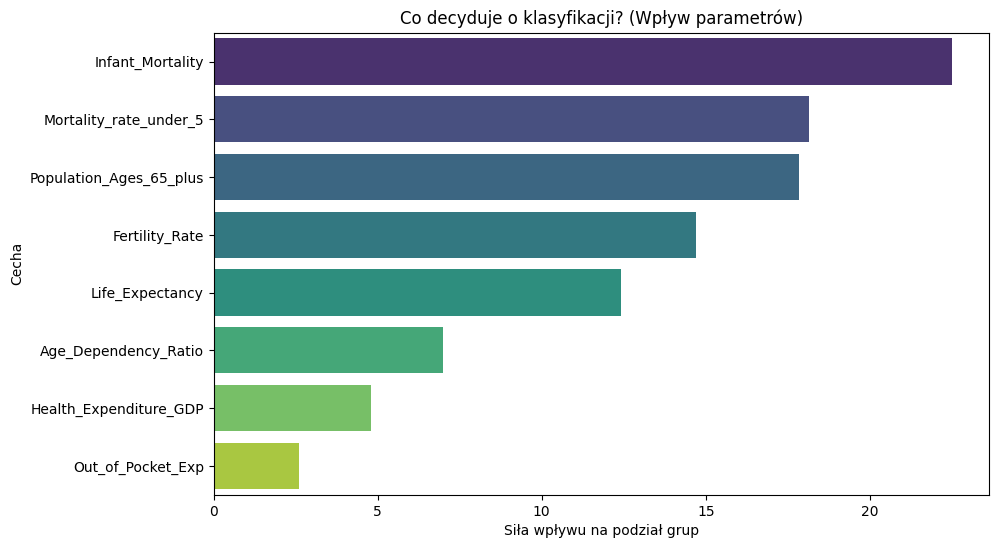

Najważniejsze 3 cechy to:
                     Cecha  Wpływ (%)
1         Infant_Mortality  22.497344
3   Mortality_rate_under_5  18.148228
4  Population_Ages_65_plus  17.831666


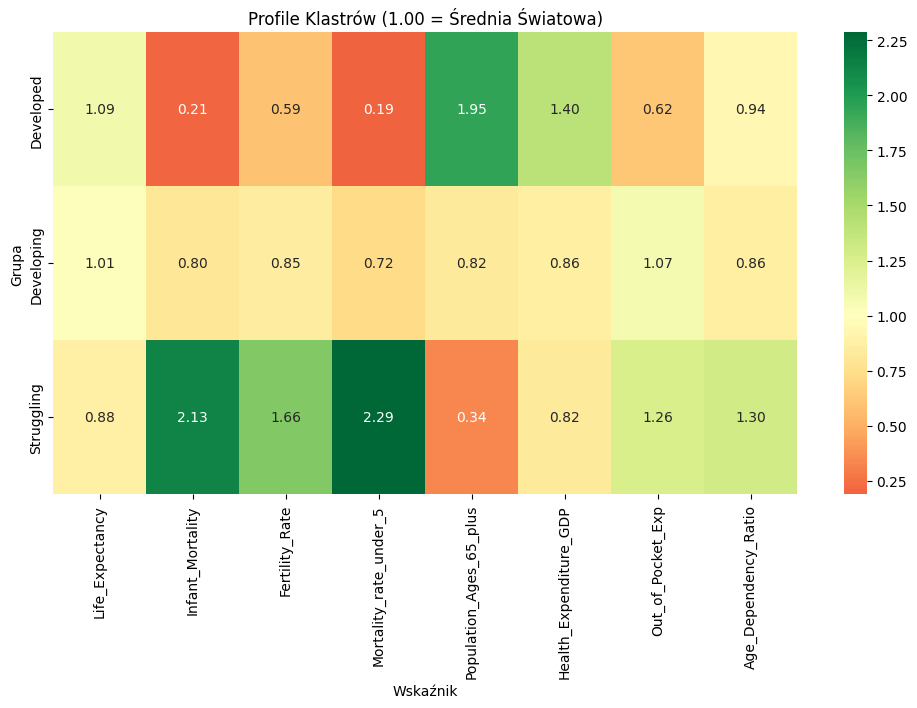

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

features = [
    'Life_Expectancy',
    'Infant_Mortality',
    'Fertility_Rate',
    'Mortality_rate_under_5',
    'Population_Ages_65_plus',
    'Health_Expenditure_GDP',
    'Out_of_Pocket_Exp',
    'Age_Dependency_Ratio'
]
# --- KONFIGURACJA ---
# Upewnij się, że masz te zmienne z poprzednich kroków:
# df - Twoja główna tabela
# features - lista kolumn użytych do klastrowania
# 'Cluster_Name' - kolumna z nazwami grup

# 1. KTÓRE PARAMETRY SĄ NAJWAŻNIEJSZE? (Feature Importance)
# Trenujemy szybki model klasyfikacji, żeby "zrozumiał", jak powstały klastry
X = df[features].fillna(0)
y = df['Cluster_ID'] # Używamy ID, bo jest cyfrą

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tworzymy tabelę ważności
importance_df = pd.DataFrame({
    'Cecha': features,
    'Wpływ (%)': rf.feature_importances_ * 100
}).sort_values(by='Wpływ (%)', ascending=False)

# Rysujemy wykres
plt.figure(figsize=(10, 6))
sns.barplot(x='Wpływ (%)', y='Cecha', data=importance_df, palette='viridis')
plt.title('Co decyduje o klasyfikacji? (Wpływ parametrów)')
plt.xlabel('Siła wpływu na podział grup')
plt.show()

print("Najważniejsze 3 cechy to:")
print(importance_df.head(3))


# 2. PROFILOWANIE KLASTRÓW (Heatmapa - Jak bardzo różnią się od średniej?)
# Obliczamy średnie dla każdej grupy
cluster_means = df.groupby('Cluster_Name')[features].mean()

# Obliczamy średnią globalną (dla całego świata)
global_means = df[features].mean()

# Obliczamy różnicę w procentach (np. 1.5 oznacza 150% średniej światowej)
# To pozwala porównać ze sobą różne jednostki (dolary, procenty, lata)
relative_profile = cluster_means / global_means

# Rysujemy Heatmapę
plt.figure(figsize=(12, 6))
sns.heatmap(relative_profile, annot=True, fmt=".2f", cmap="RdYlGn", center=1)
plt.title('Profile Klastrów (1.00 = Średnia Światowa)')
plt.ylabel('Grupa')
plt.xlabel('Wskaźnik')
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model R² score: {model.score(X_test, y_test):.4f}")

NameError: name 'y' is not defined

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Używamy lasu zamiast jednego drzewa
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Sprawdź wynik teraz
print("Nowy R2 score:", model.score(X_test, y_test))

Nowy R2 score: 0.8527714595605688


C:\Users\Dawid\AppData\Local\Temp\ipykernel_17508\75952785.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Waga', y='Cecha', data=df_waznosc, palette='viridis')


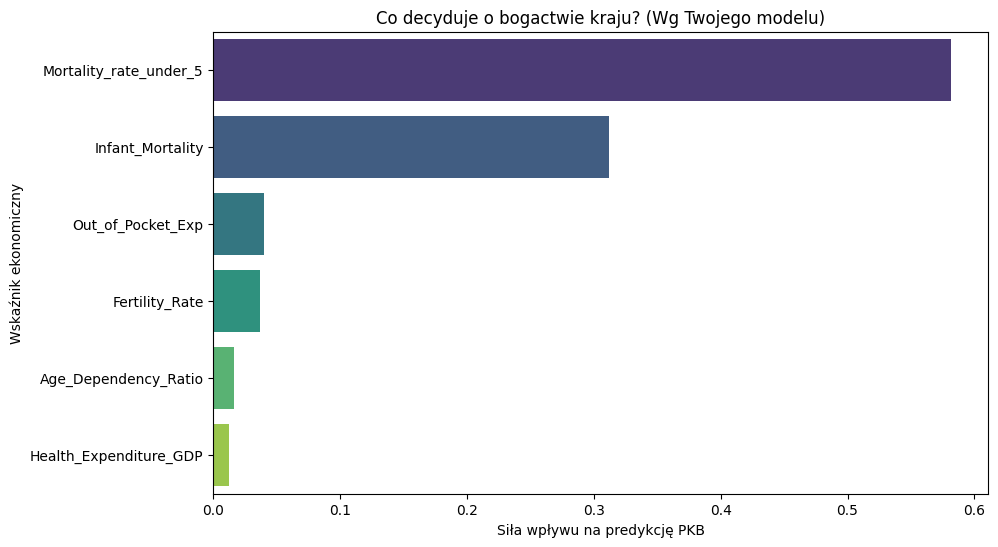

                    Cecha      Waga
2  Mortality_rate_under_5  0.581960
0        Infant_Mortality  0.312089
4       Out_of_Pocket_Exp  0.039850
1          Fertility_Rate  0.036940
5    Age_Dependency_Ratio  0.016571
3  Health_Expenditure_GDP  0.012590


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pobieramy ważność cech z Twojego modelu (Random Forest)
waznosc = model.feature_importances_

# 2. Pobieramy nazwy kolumn (cech)
nazwy_cech = X.columns

# 3. Tworzymy ładną tabelkę
df_waznosc = pd.DataFrame({
    'Cecha': nazwy_cech,
    'Waga': waznosc
})

# 4. Sortujemy od najważniejszej
df_waznosc = df_waznosc.sort_values(by='Waga', ascending=False)

# 5. Rysujemy wykres
plt.figure(figsize=(10, 6))
sns.barplot(x='Waga', y='Cecha', data=df_waznosc, palette='viridis')
plt.title('Co decyduje o bogactwie kraju? (Wg Twojego modelu)')
plt.xlabel('Siła wpływu na predykcję PKB')
plt.ylabel('Wskaźnik ekonomiczny')
plt.show()

# Wypisz też w konsoli
print(df_waznosc)